In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns



from numpy.random import uniform
from numpy.random import normal
from numpy.random import exponential
from numpy.random import lognormal

from numpy.random import choice
from numpy.random import permutation


from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

from statsmodels.sandbox.stats.multicomp import multipletests
from sklearn.cluster import KMeans


%matplotlib inline

In [2]:
import matplotlib as PLT
PLT.rcParams.update({'figure.max_open_warning': 0})
PLT.rcParams.update({'font.size': 15})

PLT.rcParams['axes.linewidth'] = 2

PLT.rcParams['xtick.major.size'] = 3
PLT.rcParams['xtick.major.width'] = 2

PLT.rcParams['ytick.major.size'] = 3
PLT.rcParams['ytick.major.width'] = 2

In [607]:
#path='https://raw.githubusercontent.com/Annatkachev/StatLAB/refs/heads/main/StatSign_1/'
path='/home/anna/PROJECTS2025/StatDatAnLAB/StatSign/'

## 200 features (for ex.genes, metabolites, protetins, etc..), we are testing whether group A and B have significant difference in mean of each feature with a t-test.

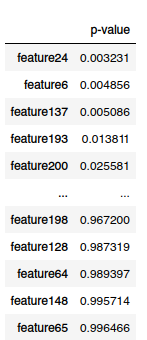

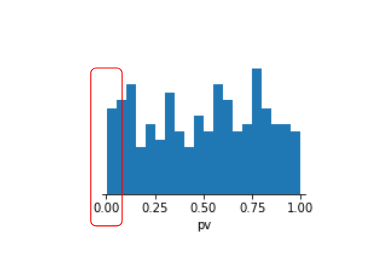

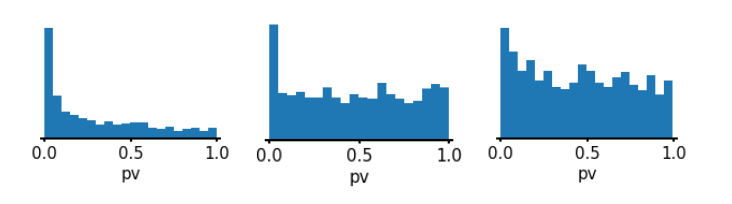

In [ ]:
## false positive, true positive, etc.

## Multiple testing correction: Bonferroni

when we want to control the probability of even one false-positive result (at level alpha)

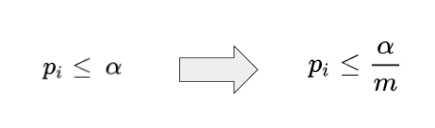

Let's assume that m0 out of m comparisons are actually null (no effect)

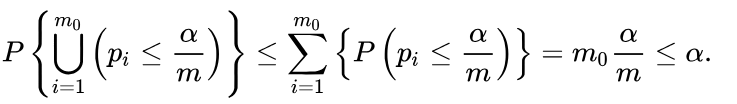

## "corrected p-values"

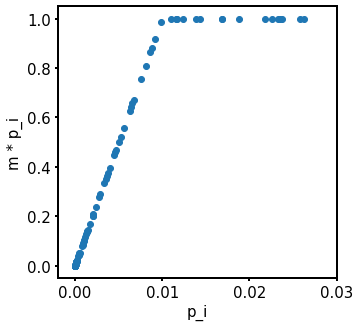

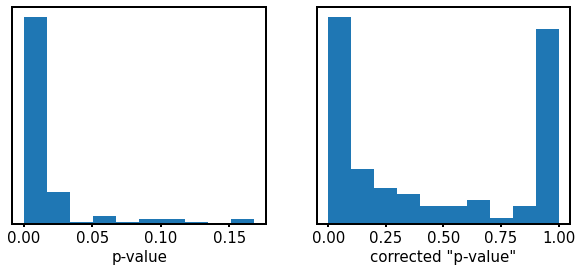

In [95]:
#number of simulations
N=100
#sample size
K=30

#number of features
#without and with actual difference in mean
nfeat1=50
nfeat2=50


datasetA=pd.DataFrame([])
datasetB=pd.DataFrame([])
for f in np.arange(0,nfeat1):
    datasetA[f]=normal(10,1,K)
    datasetB[f]=normal(10,1,K)
for f in np.arange(nfeat1,nfeat1+nfeat2):
    datasetA[f]=normal(10,1,K)
    datasetB[f]=normal(11,1,K)

Text(28.5, 0.5, 'samples')

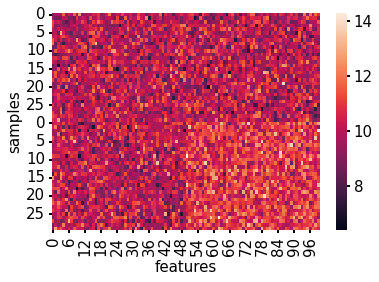

In [96]:
sns.heatmap(pd.concat([datasetA, datasetB]))
plt.xlabel('features')
plt.ylabel('samples')

In [97]:
pv=ttest_ind(datasetA,datasetB,axis=0,
                 equal_var=False)[1]
    
pv_corrected=multipletests(pv,method='bonferroni')[1]

[]

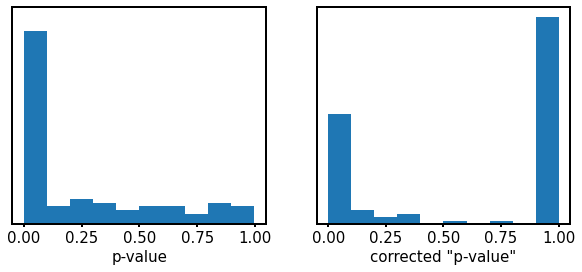

In [98]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4),sharey=True)
ax1.hist(pv)
ax1.set_xlabel('p-value')
ax1.set_yticks([])

ax2.hist(pv_corrected)
ax2.set_xlabel('corrected "p-value"')
ax2.set_yticks([])

In [126]:
#number of simulations
N=100
#sample size
K=30

#number of features
#without and with actual difference in mean
nfeat1=50
nfeat2=50

Nsignfeatures_false=pd.Series(index=np.arange(0,N),dtype=float)
Nsignfeatures_true=pd.Series(index=np.arange(0,N),dtype=float)


for i in np.arange(0,N):
    
    
    datasetA=pd.DataFrame([])
    datasetB=pd.DataFrame([])
    for f in np.arange(0,nfeat1):
        datasetA[f]=normal(10,1,K)
        datasetB[f]=normal(10,1,K)
    for f in np.arange(nfeat1,nfeat1+nfeat2):
        datasetA[f]=normal(10,1,K)
        datasetB[f]=normal(11,1,K)
        
    pv=ttest_ind(datasetA,datasetB,axis=0,
                 equal_var=False)[1]
    
    pv_corrected=multipletests(pv,method='bonferroni')[1]

    
    Nsignfeatures_false[i]=np.sum(pv_corrected[:nfeat1]<0.05)
    Nsignfeatures_true[i]=np.sum(pv_corrected[nfeat1:nfeat1+nfeat2]<0.05)

Text(0.5, 0, 'number of significant features \n among those with no real effect \n(false positives)')

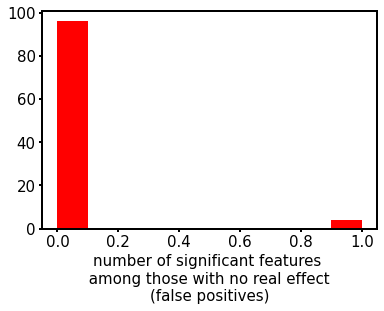

In [127]:
plt.hist(Nsignfeatures_false,color='red')
plt.xlabel('number of significant features \n among those with no real effect \n(false positives)')

Text(0.5, 0, 'number of significant features \n among those with true effect \n (true positives)')

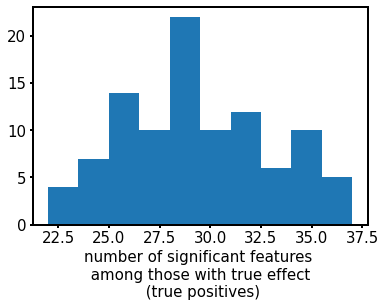

In [101]:
plt.hist(Nsignfeatures_true)
plt.xlabel('number of significant features \n among those with true effect \n (true positives)')

bonferroni correction is controling:

In [64]:
np.sum(Nsignfeatures_false>0)/100

0.01

In [65]:
# can change feature ratio, and K

 K=30 corresponds to power of 0.97

In [81]:
N=1000
K=30
pv=[]
for i in np.arange(0,N):
    
    

    A=normal(10,1,K)
    B=normal(11,1,K)
    
    pv.append(ttest_ind(A,B,equal_var=False)[1])

In [82]:
np.sum(np.array(pv)<0.05)/1000

0.86

In [ ]:
## 1. if we take K=20, only a fraction of the true positive tests will be significant

In [ ]:
## 2. What if dependency in features?

## Multiple testing correction: Benjamini-Hochberg 

when we want to control the (average) FDR level 

where FDR is the  proportion of false positives among all positive tests

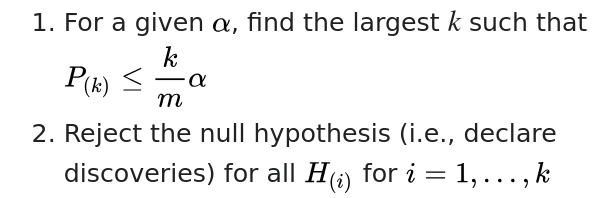

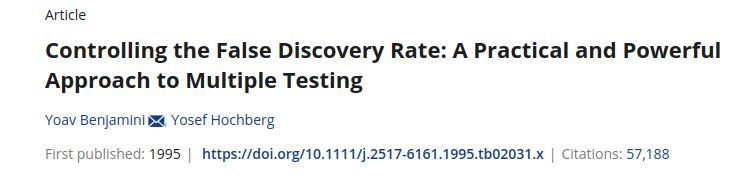

has assumptions

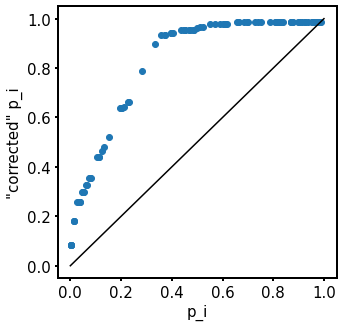

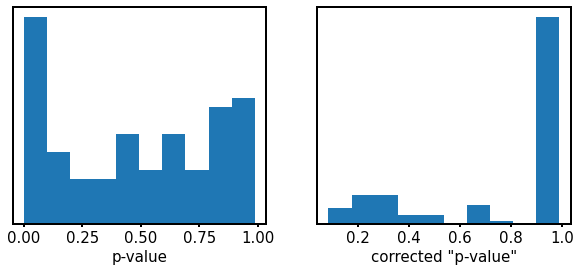

In [129]:
#number of simulations
N=100
#sample size
K=20

#number of features
#without and with actual difference in mean
nfeat1=50
nfeat2=50


datasetA=pd.DataFrame([])
datasetB=pd.DataFrame([])
for f in np.arange(0,nfeat1):
    datasetA[f]=normal(10,1,K)
    datasetB[f]=normal(10,1,K)
for f in np.arange(nfeat1,nfeat1+nfeat2):
    datasetA[f]=normal(10,1,K)
    datasetB[f]=normal(11,1,K)

Text(28.5, 0.5, 'samples')

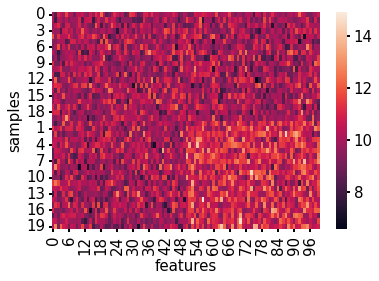

In [130]:
sns.heatmap(pd.concat([datasetA, datasetB]))
plt.xlabel('features')
plt.ylabel('samples')

In [131]:
pv=ttest_ind(datasetA,datasetB,axis=0,
                 equal_var=False)[1]
    
#pv_corrected=multipletests(pv,method='bonferroni')[1]
pv_corrected=multipletests(pv,method='fdr_bh')[1]

[]

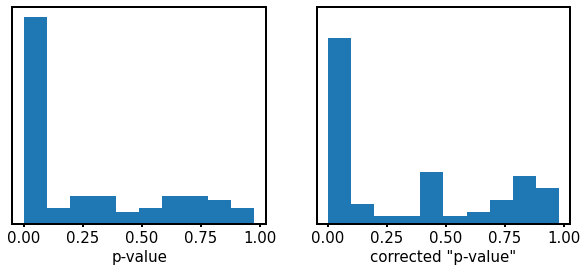

In [132]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,4),sharey=True)
ax1.hist(pv)
ax1.set_xlabel('p-value')
ax1.set_yticks([])

ax2.hist(pv_corrected)
ax2.set_xlabel('corrected "p-value"')
ax2.set_yticks([])

In [147]:
#number of simulations
N=100
#sample size
K=20

#number of features
#without and with actual difference in mean
nfeat1=50
nfeat2=50

Nsignfeatures_false=pd.Series(index=np.arange(0,N),dtype=float)
Nsignfeatures_true=pd.Series(index=np.arange(0,N),dtype=float)


for i in np.arange(0,N):
    
    
    datasetA=pd.DataFrame([])
    datasetB=pd.DataFrame([])
    for f in np.arange(0,nfeat1):
        datasetA[f]=normal(10,1,K)
        datasetB[f]=normal(10,1,K)
    for f in np.arange(nfeat1,nfeat1+nfeat2):
        datasetA[f]=normal(10,1,K)
        datasetB[f]=normal(11,1,K)
        
    pv=ttest_ind(datasetA,datasetB,axis=0,
                 equal_var=False)[1]
    
    pv_corrected=multipletests(pv,method='fdr_bh')[1]

    
    Nsignfeatures_false[i]=np.sum(pv_corrected[:nfeat1]<0.05)
    Nsignfeatures_true[i]=np.sum(pv_corrected[nfeat1:nfeat1+nfeat2]<0.05)

Text(0.5, 0, 'number of significant features \n among those with no real effect \n(false positives)')

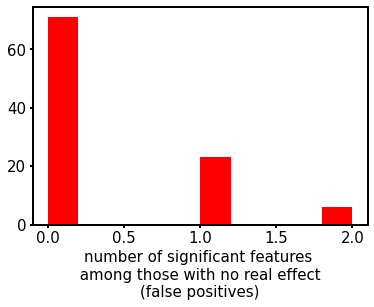

In [148]:
plt.hist(Nsignfeatures_false,color='red')
plt.xlabel('number of significant features \n among those with no real effect \n(false positives)')

Text(0.5, 0, 'number of significant features \n among those with true effect \n (true positives)')

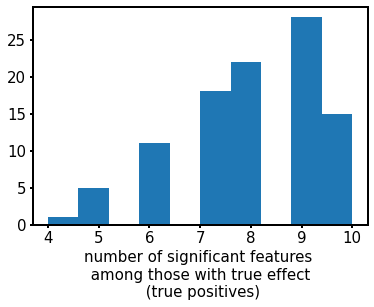

In [149]:
plt.hist(Nsignfeatures_true)
plt.xlabel('number of significant features \n among those with true effect \n (true positives)')

In [150]:
np.sum(Nsignfeatures_false>0)/100

0.29

In [151]:
Nsignfeatures_total=Nsignfeatures_false+Nsignfeatures_true

Text(0.5, 0, 'FDR')

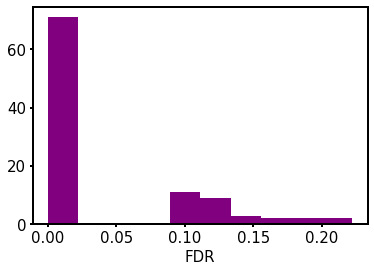

In [152]:
plt.hist(Nsignfeatures_false/Nsignfeatures_total,color='purple')
plt.xlabel('FDR')

In [153]:
np.mean(Nsignfeatures_false/Nsignfeatures_total)

0.0367958152958153

## Why 5%?

## permutations

In [1120]:
#number of simulations
N=100
#sample size
K=20

#number of features
#without and with actual difference in mean
nfeat1=50
nfeat2=50


datasetA=pd.DataFrame([])
datasetB=pd.DataFrame([])
for f in np.arange(0,nfeat1):
    datasetA[f]=normal(10,1,K)
    datasetB[f]=normal(10,1,K)
for f in np.arange(nfeat1,nfeat1+nfeat2):
    datasetA[f]=normal(10,1,K)
    datasetB[f]=normal(11,1,K)

In [1121]:
X=pd.concat([datasetA, datasetB])
X.index=['A'+str(i) for i in np.arange(1,len(datasetA.index)+1)]+\
['B'+str(i) for i in np.arange(1,len(datasetB.index)+1)]
X.columns=['feature'+str(i) for i in np.arange(1,len(X.columns)+1)]

Text(28.5, 0.5, 'samples')

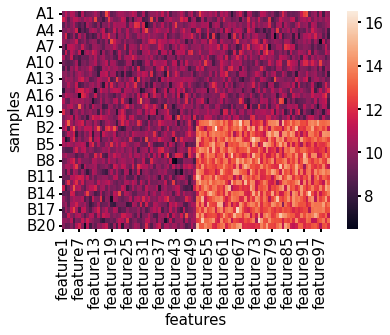

In [1122]:
sns.heatmap(X)
plt.xlabel('features')
plt.ylabel('samples')

In [1123]:
pv=ttest_ind(datasetA,datasetB,axis=0,equal_var=False)[1]

Text(0.5, 0, 'p-value')

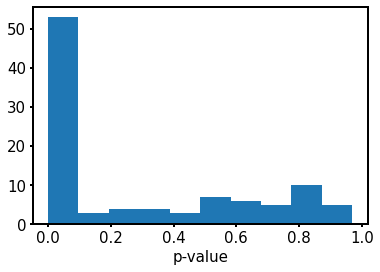

In [1124]:
plt.hist(pv)
plt.xlabel('p-value')

<AxesSubplot:>

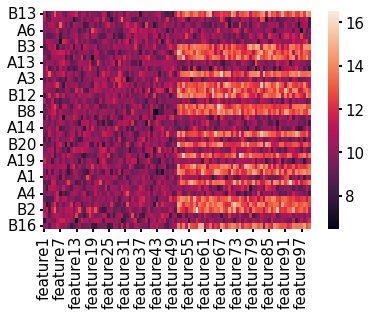

In [1125]:
ind=permutation(X.index)
inda=ind[:K]
indb=ind[K:]
sns.heatmap(X.loc[list(inda)+list(indb)])

Text(0.5, 0, 'p-value for permutated data')

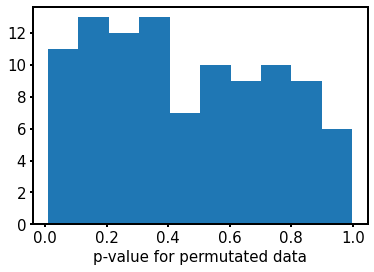

In [1147]:
ind=permutation(X.index)
inda=ind[:K]
indb=ind[K:]
pv=ttest_ind(X.loc[inda],X.loc[indb],axis=0,equal_var=False)[1]
plt.hist(pv)
plt.xlabel('p-value for permutated data')

In [1148]:
N=1000
nsign=pd.Series(index=np.arange(0,N),dtype=float)

for i in np.arange(0,N):
    ind=permutation(X.index)
    inda=ind[:K]
    indb=ind[K:]
    pv=ttest_ind(X.loc[inda],X.loc[indb],axis=0,equal_var=False)[1]
    nsign[i]=np.sum(pv<0.05)

In [1149]:
np.mean(nsign)

4.873

## permutation test

In [222]:
df=pd.read_csv(path+'dfAB.csv',index_col=0)

In [253]:
inda=[i for i in df.index if 'A' in i]
indb=[i for i in df.index if 'B' in i]

<AxesSubplot:>

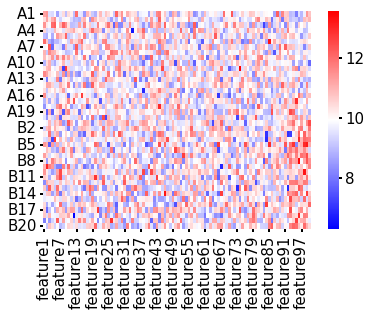

In [254]:
sns.heatmap(df,cmap='bwr')

In [255]:
pv=ttest_ind(df.loc[inda],df.loc[indb],axis=0,
                 equal_var=False)[1]

Text(0.5, 0, 'p-value')

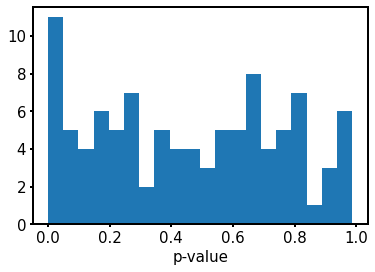

In [256]:
plt.hist(pv,bins=20)
plt.xlabel('p-value')

In [257]:
np.sum(pv<0.05)

11

## Taking nominal p-value 5%, do we get more significant features than expected by chance, when there is no true difference between groups A and B?

we can make a test for this hypothesis and calculate a corresponding p-value

In [228]:
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature91,feature92,feature93,feature94,feature95,feature96,feature97,feature98,feature99,feature100
A1,11.189820,11.404033,9.491479,9.403378,9.856505,8.611187,9.622057,10.404714,8.984412,10.404662,...,10.617294,10.721469,8.955691,9.124560,8.096788,9.483315,8.922227,9.716490,11.358936,10.761217
A2,10.391178,11.244822,10.316828,11.088371,11.502431,9.802938,9.316278,9.786443,9.988422,10.021174,...,10.726216,10.544934,9.055708,9.292658,9.197131,8.574427,8.969947,10.833554,10.572350,10.953037
A3,11.455004,10.249187,9.820721,11.988908,12.185709,9.897076,10.989671,12.168308,11.503334,10.352915,...,8.267234,11.158627,9.597913,10.074859,8.531206,10.526624,9.935250,10.278680,9.155601,9.900833
A4,10.537251,9.279794,9.526002,9.324803,10.866911,10.190831,10.052305,9.473503,10.442542,10.574281,...,9.275271,11.701944,10.040593,10.071010,9.239227,10.022453,9.798446,8.973277,9.111329,9.985261
A5,8.964289,8.789857,9.830032,8.750835,9.994949,11.333572,10.839720,10.488298,12.115856,9.075059,...,11.065237,10.018407,10.675357,10.852295,10.008154,9.737446,8.459509,9.324687,9.566014,10.648668


In [229]:
permutation(df.index)

array(['A8', 'B6', 'B4', 'A15', 'B7', 'B16', 'A3', 'B13', 'B19', 'A10',
       'A4', 'B17', 'B15', 'A7', 'A6', 'A16', 'B14', 'A14', 'B9', 'B18',
       'B5', 'A2', 'A5', 'A18', 'A9', 'B12', 'A11', 'B10', 'B1', 'B2',
       'B11', 'B3', 'A13', 'A19', 'A1', 'A12', 'A17', 'B8', 'A20', 'B20'],
      dtype=object)

In [230]:
randomind=permutation(df.index)
inda=randomind[:20]
indb=randomind[20:]

In [258]:
N=10000
n_random=pd.Series(index=np.arange(0,N),dtype=float)


for i in np.arange(0,N):
    randomind=permutation(df.index)
    inda=randomind[:20]
    indb=randomind[20:]
    
    pv=ttest_ind(df.loc[inda],df.loc[indb],axis=0,
                 equal_var=False)[1]
    
    n_random[i]=np.sum(pv<0.05)

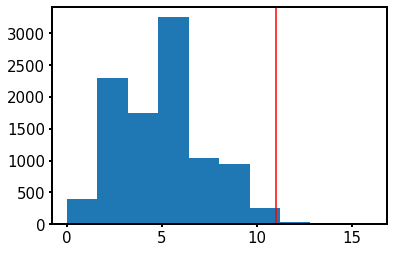

In [259]:
plt.hist(n_random)
plt.axvline(11,color='red')

permutation p-value

In [261]:
np.sum(n_random>=11)/N

0.0134

estimate FDR

## other example

In [1198]:
#sample size
K=30


X=pd.Series(list(normal(10,1,K))+list(normal(11,1,K)),dtype=float)

In [1199]:
inda=X.index[:K]
indb=X.index[K:]
original_statistics=np.abs(X[inda].mean()-X[indb].mean())

In [1204]:
N=1000
statistics=pd.Series(index=np.arange(0,N),dtype=float)


for i in np.arange(0,N):
    randomind=permutation(X.index)
    inda=randomind[:K]
    indb=randomind[K:]
    
    statistics[i]=np.abs(X[inda].mean()-X[indb].mean())
                 

Text(0.5, 0, 'difference in means')

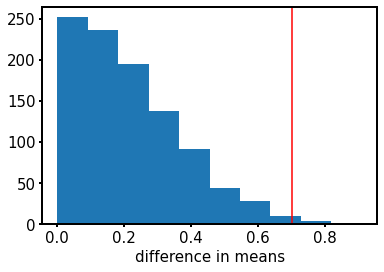

In [1205]:
plt.hist(statistics)
plt.axvline(x=original_statistics,color='red')
plt.xlabel('difference in means')

In [1206]:
np.sum(statistics>=original_statistics)/N

0.008

# example dependent samples

In [915]:
df=pd.read_csv(path+'var_duplicates.csv',index_col=0)

In [916]:
df=df.sort_values('donor')

In [917]:
inda=df[df['group']=='A'].index
indb=df[df['group']=='B'].index

In [918]:
ttest_ind(df.loc[inda,'var'],df.loc[indb,'var'],equal_var=False)

Ttest_indResult(statistic=-2.6884971887401368, pvalue=0.007791100061249778)

In [919]:
origingalPV=ttest_ind(df.loc[inda,'var'],df.loc[indb,'var'],equal_var=False)[1]

In [920]:
tmp=df.drop_duplicates('donor')
inda=tmp[tmp['group']=='A'].index
indb=tmp[tmp['group']=='B'].index

In [921]:
ttest_ind(df.loc[inda,'var'],df.loc[indb,'var'],equal_var=False)

Ttest_indResult(statistic=-1.9612145463733701, pvalue=0.05273348471395026)

In [922]:
donors=list(df['donor'].unique())
group=pd.Series(list(df['group']),index=df['donor'])

In [923]:
perm=pd.Series(permutation(donors),index=donors)
df['randgroup']=list(group.loc[perm])

In [924]:
df.groupby(['donor','group']).count()
#df.groupby(['donor','randgroup']).count()

,,var,randgroup
donor,group,,
SA1,A,2,2
SA10,A,2,2
SA11,A,2,2
SA12,A,2,2
SA13,A,2,2
...,...,...,...
SB50,B,2,2
SB6,B,2,2
SB7,B,2,2


permutation: not the 'group'

In [950]:
df.head()

,var,group,donor,randgroup
0,12.320493,A,SA1,B
50,11.291206,A,SA1,B
59,8.950692,A,SA10,A
9,7.149220,A,SA10,A
60,10.017394,A,SA11,A


In [925]:
N=1000
pv=pd.Series(index=np.arange(0,N),dtype=float)

for i in np.arange(0,N):
    perm=pd.Series(permutation(donors),index=donors)
    df['randgroup']=list(group.loc[perm])
    inda=df[df['randgroup']=='A'].index
    indb=df[df['randgroup']=='B'].index
    
    pv[i]=ttest_ind(df.loc[inda,'var'],df.loc[indb,'var'],equal_var=False)[1]

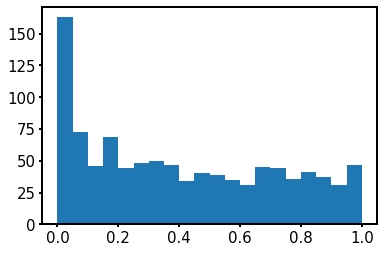

In [926]:
plt.hist(pv,bins=20);

permutation p-value

In [927]:
np.sum(pv<=origingalPV)/N

0.045

If multiple testing, we instead of recalculating the p-value, we could set a p-value thershold, and estimate the permutation FDR

## example dependent features

In [931]:
x=pd.read_csv(path+'rat_plasmalipids.csv',index_col=0)
y=pd.read_csv(path+'rat_brainlipids.csv',index_col=0)

In [934]:
lipids=x.columns[2:]

In [937]:
xind_exp=x[x['SNC']=='snc'].index
xind_con=x[x['SNC']=='sham'].index
    
yind_exp=y[y['SNC']=='snc'].index
yind_con=y[y['SNC']=='sham'].index
    
    
original_pv=pearsonr(x.loc[xind_exp,lipids].mean()-x.loc[xind_con,lipids].mean(),
           y.loc[yind_exp,lipids].mean()-y.loc[yind_con,lipids].mean())[1]
    
original_corr=pearsonr(x.loc[xind_exp,lipids].mean()-x.loc[xind_con,lipids].mean(),
           y.loc[yind_exp,lipids].mean()-y.loc[yind_con,lipids].mean())[0]

Text(0.5, 1.0, 'one point - one metabolite')

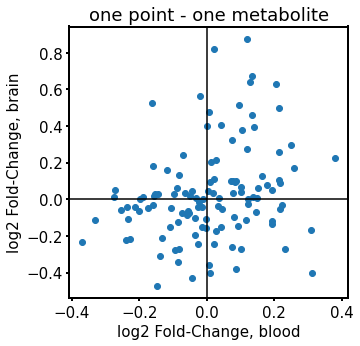

In [944]:
fig=plt.figure(figsize=(5,5))
plt.scatter(x.loc[xind_exp,lipids].mean()-x.loc[xind_con,lipids].mean(),
           y.loc[yind_exp,lipids].mean()-y.loc[yind_con,lipids].mean())
plt.axhline(color='black')
plt.axvline(color='black')
plt.xlabel('log2 Fold-Change, blood')
plt.ylabel('log2 Fold-Change, brain')
plt.title('one point - one metabolite')

permutation: not each feature independently

In [961]:
permutation(y['SNC'])

array(['sham', 'snc', 'snc', 'snc', 'sham', 'snc', 'sham', 'snc', 'sham',
       'sham', 'snc', 'snc', 'snc', 'snc', 'sham', 'sham', 'sham', 'snc',
       'snc', 'snc'], dtype=object)

In [971]:
N=100

pv=pd.Series(index=np.arange(0,N),dtype=float)
corr=pd.Series(index=np.arange(0,N),dtype=float)

for i in np.arange(0,N):
    
    x['SNCrand']=permutation(x['SNC'])
    y['SNCrand']=permutation(y['SNC'])
    
    
    xind_exp=x[x['SNCrand']=='snc'].index
    xind_con=x[x['SNCrand']=='sham'].index
    
    yind_exp=y[y['SNCrand']=='snc'].index
    yind_con=y[y['SNCrand']=='sham'].index
    
    
    pv[i]=pearsonr(x.loc[xind_exp,lipids].mean()-x.loc[xind_con,lipids].mean(),
           y.loc[yind_exp,lipids].mean()-y.loc[yind_con,lipids].mean())[1]
    
    corr[i]=pearsonr(x.loc[xind_exp,lipids].mean()-x.loc[xind_con,lipids].mean(),
           y.loc[yind_exp,lipids].mean()-y.loc[yind_con,lipids].mean())[0]

Text(0.5, 0, 'p-value of correlation after permutation')

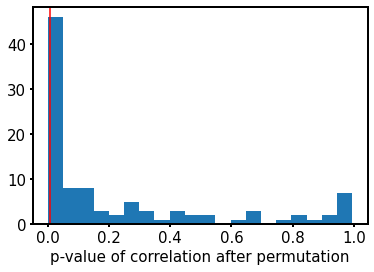

In [972]:
plt.hist(pv,bins=20);
plt.axvline(original_pv,color='red')
plt.xlabel('p-value of correlation after permutation')

permutation p-value

In [973]:
np.sum(pv<=original_pv)/N

0.26

Text(0.5, 0, 'corr. coefficients after permutation')

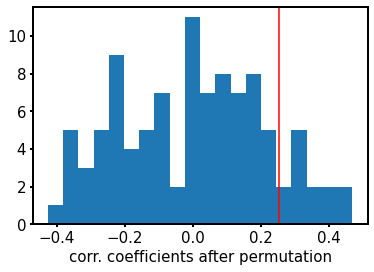

In [974]:
plt.hist(corr,bins=20);
plt.axvline(original_corr,color='red')
plt.xlabel('corr. coefficients after permutation')